### Machine Learning for Regression

#### 1. Loading libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 2. Data preparation

In [2]:
###
df = pd.read_csv("../W1/homework/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
### standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
### find object type columns
strings = list(df.dtypes[df.dtypes == "object"].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [5]:
### standardize object columns entries
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### 3. Exploratory data analysis

In [7]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

price distribution

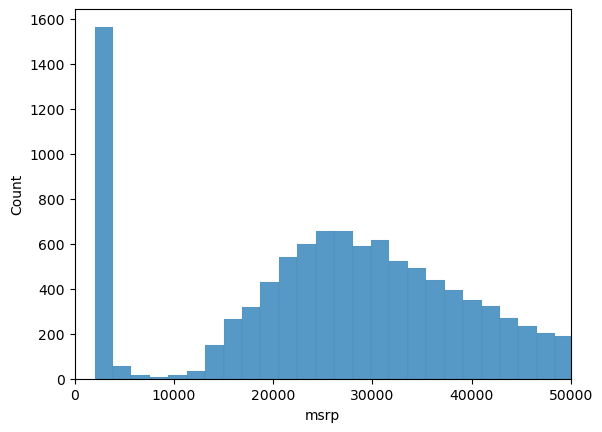

In [8]:
fig, ax = plt.subplots(1)
sns.histplot(df.msrp, bins="fd", ax=ax)
ax.set_xlim(0, 50000)
plt.show()

In [9]:
price_logs = np.log1p(df.msrp)

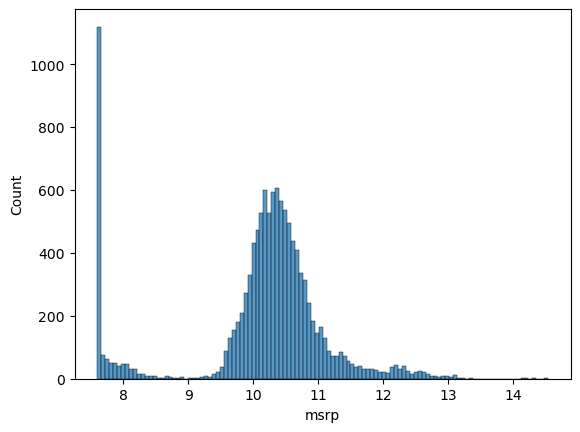

In [10]:
fig, ax = plt.subplots(1)
sns.histplot(price_logs, bins="fd", ax=ax)
# ax.set_xlim(0, 50000)
plt.show()

missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

### 4. Setting up the validation framework

In [12]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [13]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [14]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val+n_test]
df_train = df.iloc[n_val+n_test:]

But we want to shuffle data

In [15]:
idx = np.arange(n)

In [16]:
np.random.seed(2)
np.random.shuffle(idx)

In [17]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [18]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [19]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [20]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [23]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

### 5. Linear Regression

draw

In [24]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [25]:
xi = [453, 11, 86]

In [26]:
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [27]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
    # so something
    return pred

In [28]:
linear_regression(xi)

12.312

In [29]:
np.expm1(12.312)

222347.2221101062

### 6. Vector Form

In [30]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res

In [31]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [32]:
w_new = [w0]+w

In [33]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [34]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [35]:
linear_regression(xi)

12.312

In [36]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [37]:
def linear_regression(X):
    return X.dot(w_new)

In [38]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

### 7. Training the model

In [39]:
### use Gram matrix

In [40]:
def train_linear_regression(X, y):
    pass

In [41]:

X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [42]:
# ones = np.ones(X.shape[0])
# ones

In [43]:
# X = np.column_stack([ones, X])

In [44]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [45]:
# XTX = X.T.dot(X)

In [46]:
# XTX_inv = np.linalg.inv(XTX)

In [47]:
# XTX_inv.dot(X.T).dot(y)

In [48]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [49]:
train_linear_regression(X, y)

(25844.754055766833, array([ -16.08906468, -199.47254894,   -1.22802883]))

### 8. Car price baseline model

In [50]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [51]:
base = [
    'engine_hp',
    'engine_cylinders',
    'highway_mpg',
    'city_mpg',
    'popularity'
    ]

X_train =df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

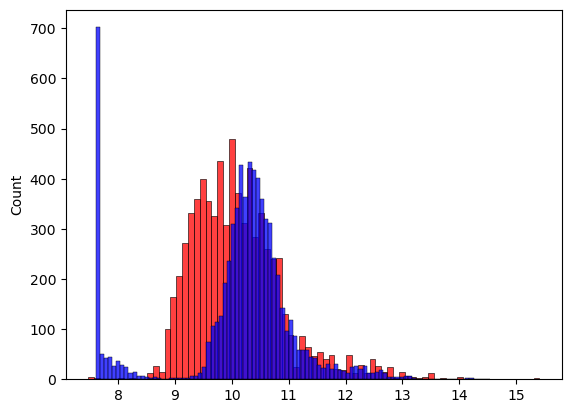

In [52]:
sns.histplot(y_pred, color='red', bins='fd')
sns.histplot(y_train, color='blue', bins="fd")

### 9. RMSE

In [53]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [54]:
rmse(y_train, y_pred)

0.7554192603920132

### 10 Validating the Model

In [55]:
base = [
    'engine_hp',
    'engine_cylinders',
    'highway_mpg',
    'city_mpg',
    'popularity'
    ]

X_train =df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [56]:
def prepare_X(df):
    df_num = df[base]

    df_num = df_num.fillna(0)
    X = df_num.values
    return X
    

In [57]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301601

### 11. Simple fefature engineering

In [58]:
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [59]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ["age"]
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [60]:
X_train = prepare_X(df_train)

In [61]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058319

<AxesSubplot:ylabel='Count'>

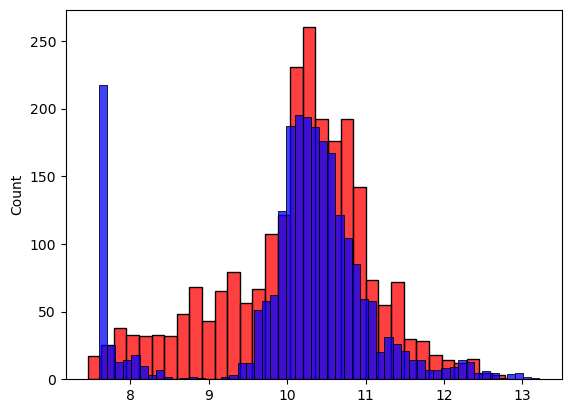

In [62]:
sns.histplot(y_pred, color='red', bins='fd')
sns.histplot(y_val, color='blue', bins="fd")

### 12. Categorical Variables

In [63]:
df_train.dtypes[df_train.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [64]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append("age")

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append("num_doors_%s" % v)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [65]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5157995641502838

In [66]:
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [67]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append("age")

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append("num_doors_%s" % v)
    
    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append("make_%s" % v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [68]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5076038849555357

In [69]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [70]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
    'market_category', 'vehicle_size', 'vehicle_style'
    ]

In [71]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)


In [72]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append("age")

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append("num_doors_%s" % v)
    
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [73]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

228.21564494148686

### 13. Regularization

In [74]:
### singular matrix problem 

In [75]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [76]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

228.21564494148686

### 14. Tuning the Model

In [77]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, score)

0.0 -1.406423837929128e+16 228.21564494148686
1e-05 6.60524878287399 0.4565170312531722
0.0001 6.3407015923279335 0.4565170650025624
0.001 6.285595092959219 0.45651750879961933
0.01 6.276604537112089 0.4565219901220111
0.1 6.191208671973604 0.45656927630164557
1 5.6348966683454815 0.4572204317994596
10 4.283980108956138 0.47014569321011535


### 15. Using the Model

In [78]:
df_full_train = pd.concat([df_train, df_val])

In [79]:
df_full_train = df_full_train.reset_index(drop=True)

In [80]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [81]:
y_full_train = np.concatenate([y_train, y_val])

In [82]:
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

In [83]:
w0

6.285595092959219

In [84]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.4522284725759874

In [85]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [86]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [87]:
X_small = prepare_X(df_small)

In [88]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.442849600958581

In [89]:
np.expm1(y_pred)

34297.249640358794

In [90]:
np.expm1(y_test[20])

35000.00000000001